In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

In [8]:
#Getting the X and Y values from saved files 
pathDataSet = "/content/drive/MyDrive/UrbanSoundsClassification_DataSets"

dataSetList = os.listdir(pathDataSet)

for Data in dataSetList:
  print(Data[:-4])
  exec(Data[:-4] + " = np.load('"+pathDataSet+"/"+Data+"')")

X_train
y_train
X_val
y_val
X_test
y_test


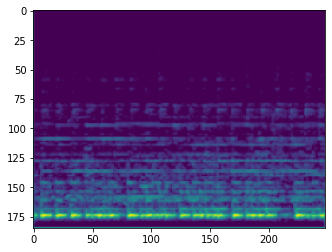

(185, 248)


In [9]:
plt.imshow(X_test[789])
plt.show()
# Print the shape of the sample image
print(X_test[789].shape)

In [11]:
# Print the lengths of the each dataset
print(f"X_train: {len(X_train)}")
print(f"X_val: {len(X_val)}")
print(f"X_test: {len(X_test)}")

X_train: 6985
X_val: 873
X_test: 874


In [13]:
# Create a model object
model = tf.keras.Sequential()

In [14]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="relu",
                                input_shape=(185,248,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="relu",
                                input_shape=(185,248,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [15]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="relu",
                                input_shape=(185,248,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="relu",
                                input_shape=(185,248,1)))

In [16]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [17]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [18]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [19]:
# Compile the model
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 185, 248, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 92, 124, 64)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 124, 64)       36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 62, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 31, 64)       0

In [22]:
# Adding early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[es_callback])

Epoch 1/50
55/55 [==============================] - 29s 315ms/step - loss: 2.0499 - accuracy: 0.2495 - val_loss: 1.6311 - val_accuracy: 0.4960
Epoch 2/50
55/55 [==============================] - 14s 256ms/step - loss: 1.6114 - accuracy: 0.4169 - val_loss: 1.2430 - val_accuracy: 0.6300
Epoch 3/50
55/55 [==============================] - 14s 260ms/step - loss: 1.3009 - accuracy: 0.5482 - val_loss: 1.0719 - val_accuracy: 0.6392
Epoch 4/50
55/55 [==============================] - 15s 264ms/step - loss: 1.0696 - accuracy: 0.6387 - val_loss: 0.7256 - val_accuracy: 0.7824
Epoch 5/50
55/55 [==============================] - 15s 269ms/step - loss: 0.9023 - accuracy: 0.6978 - val_loss: 0.6937 - val_accuracy: 0.7847
Epoch 6/50
55/55 [==============================] - 15s 268ms/step - loss: 0.7604 - accuracy: 0.7482 - val_loss: 0.6122 - val_accuracy: 0.7961
Epoch 7/50
55/55 [==============================] - 15s 264ms/step - loss: 0.6897 - accuracy: 0.7712 - val_loss: 0.5617 - val_accuracy: 0.8282

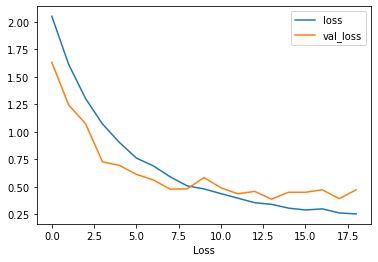

In [23]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.xlabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

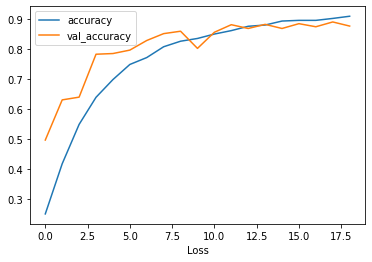

In [29]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.xlabel("Loss")

# Put legend table
plt.legend()


# Show the plot
plt.show()

In [24]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 34ms/step - loss: 0.4793 - accuracy: 0.9005


[0.4792778789997101, 0.9004576802253723]

In [25]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1,185, 248, 1))

# Print the prediction result
prediction_result

array([[1.6348440e-05, 1.6122242e-06, 1.5045637e-04, 4.1630134e-08,
        3.7294817e-06, 2.4937417e-08, 4.9988590e-11, 2.1690358e-08,
        1.6066657e-05, 9.9981171e-01]], dtype=float32)

In [26]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [27]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %") 

This image belongs to class 9 with 0.9998117089271545 probability %


In [28]:
predicted ={
  0: "air_conditioner",
  1: "car_horn",
  2: "children_playing",
  3: "dog_bark",
  4: "drilling",
  5: "engine_idling",
  6: "gun_shot",
  7: "jackhammer",
  8: "siren",
  9: "street_music"
}
# Print the results
print(f"This image belongs to class {predicted[predicted_class]} with {predicted_probability} probability %")


This image belongs to class street_music with 0.9998117089271545 probability %


In [ ]:
## HiperParametre Optimizasyonunu deneme yanılma olarak yaptık. 4. conv2d layerı eklediğimizde daha başarılı sonuçlar elde ettik. 
## Sigmoid activasyon fpnkisunu denedik daha düşük acc. ve daha yüksek loss olduğu için relu kullanmaya devam ettik.
## Layerlar için kullanılan filtre değerleri 32 den 64 ve 128 değerlerini denedik. 128 değeri performası çok az yükseltsede kodun çalışmasını çok yavaşlatıyordu.